In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.signal as sig
plt.rcParams["figure.figsize"] = [20,8]

In [2]:
t=np.linspace(0,3,10001)

Modulating signal ( message )

In [45]:
fc2=2
m=sig.square(2*np.pi*fc2*t,0.3333333)

Text(0.5, 0, 't')

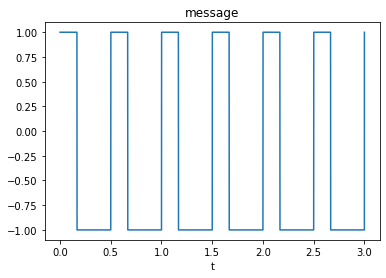

In [46]:
plt.plot(t,m)
plt.title("message")
plt.xlabel("t")

In [47]:
# phase offset as a function of the message
theta_zero=0
def theta(kf,signal,x):
    return(theta_zero + 2*np.pi*kf*integrate.simps(signal,x))

Carrier wave

In [48]:
fc=20
Ac=2
carrier=Ac*np.cos(2*np.pi*fc*t)

FM wave

In [49]:
kf=8 # define kf of FM wave
FM_wave=[]
FM_wave.append(0) # boundary condition for integration
FM_wave[1:] = [Ac*np.cos(2*np.pi*fc*t[x] + theta(kf,m[:x],t[:x])) for x in range(1,10001)]

Plotting input and output on the same graph

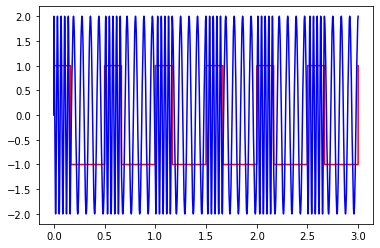

In [50]:
plt.plot(t,m,'r')
plt.plot(t,FM_wave,'b')
# plt.xlim(0,0.5)

(0, 0.5)

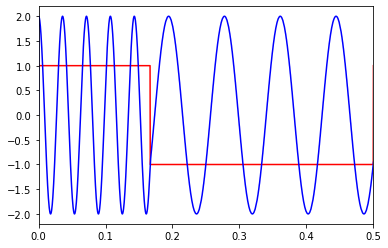

In [55]:
#Zoomed in
plt.plot(t,m,'r')
plt.plot(t,FM_wave,'b')
plt.xlim(0,0.5)

Magnitude spectrum

(array([3.54792320e-06, 1.41137196e-05, 2.38107960e-05, ...,
        2.38107960e-05, 1.41137196e-05, 3.54792320e-06]),
 array([-0.99990001, -0.99970003, -0.99950005, ...,  0.99950005,
         0.99970003,  0.99990001]),
 <matplotlib.lines.Line2D at 0x1f622211ac8>)

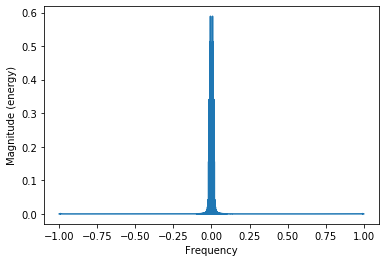

In [52]:
plt.magnitude_spectrum(FM_wave,sides='twosided')

In [53]:
# plotting theta
phase_diff=[]
phase_diff.append(0)
phase_diff[1:]=[theta(kf,m[:x],t[:x]) for x in range(1,10001)]

(array([0.00079766, 0.00119345, 0.00139438, ..., 0.00139438, 0.00119345,
        0.00079766]),
 array([-0.99990001, -0.99970003, -0.99950005, ...,  0.99950005,
         0.99970003,  0.99990001]),
 <matplotlib.lines.Line2D at 0x1f62227aa88>)

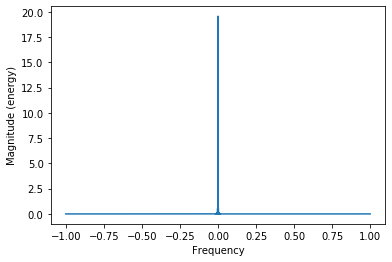

In [54]:
plt.magnitude_spectrum(phase_diff,sides='twosided')